### Pandas

Pandas is a python package for importing and working with tabular data,  such as spreadsheet tables

It provides for a dataframe style interface,  very similar to data frames in R

Pandas is using NumPy matrices "underneath" the Pandas structures,  and it is easy to "extract" NumPy matrices from a Pandas
dataframe.   Many functions in sklearn and other packages will accept either Pandas data frames or NumPy matrices as inputs.

Pandas allows for different types of data per column, as opposed by the requirement in NumPy that the matrices be homogeneous.

Pandas has a massive number of built in functions,  that allow for vectorized operations on the DataFrame,  plus a bunch of visualization tools built into it.

Pandas does have some quirks in how you handle accessing and slicing the data, it doesn't use the standard square bracket approach   df[1,2] does not work,  watch for that

Updated 1/30/2024

# Sources of this material

Chapter 5 of "Python for Data Analysis"- Wes McKinney

    https://learning.oreilly.com/library/view/python-for-data/9781491957653/ch05.html
    
The Pandas website is at

    https://pandas.pydata.org/

    
    

# Panda Series

1-D array like objects in Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
# creating a series from a list

#lists have indices and objects

my_obj=pd.Series([4,7,-9,2])

In [3]:
my_obj

0    4
1    7
2   -9
3    2
dtype: int64

In [4]:
my_obj.values

array([ 4,  7, -9,  2])

In [5]:
# this is the index to this obj

my_obj.index

RangeIndex(start=0, stop=4, step=1)

Question- what is a RangeIndex??   

The total range of the index


In [6]:
# we can specify the index when creating the series

my_series2=pd.Series([-1,2,3,11],index=['a','b','c','d'])

# we can then select values with the index- note this as a difference from a numpy array

my_series2['b']

2

A series is sort of like a fixed length dictionary,  it is easy to create a series from a dictionary

In [7]:
s_dict={"Ohio":2,"Pennsylvania":11,"Texas":311}

my_series3=pd.Series(s_dict)

my_series3

Ohio              2
Pennsylvania     11
Texas           311
dtype: int64

Series automatically align the indexes when you do operations with them,  kind like a join

In [8]:

s_dict2={"Ohio":8,"Pennsylvania":9,"New York":89,"Texas":10}

my_series4=pd.Series(s_dict2)

my_series3+my_series4

#note the insertion of NaN when there is no matching entry,   output is also sorted by index

New York          NaN
Ohio             10.0
Pennsylvania     20.0
Texas           321.0
dtype: float64

In [9]:
# detecting the null entry

out_series=my_series3+my_series4

out_series.isnull()

New York         True
Ohio            False
Pennsylvania    False
Texas           False
dtype: bool

The interesting feature of Pandas Series is that the can be date indexed,  so that the series is representing a time series
in this form, there are a whole bunch of member functions for working with the data as a time series.

See

    https://pandas.pydata.org/docs/reference/series.html

We'll see about coming back to time series analysis a bit later if I can locate a good discussion of how Pandas series are used
in this approach.  They seem to be more commonly found as a component of pandas dataframes.


    https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

# DataFrames in Pandas

Pandas has dataframes,   each column of a data frame is a Pandas series,  these are the two basic storage forms in Pandas

We can move data into Pandas data frames in a number of ways

-manual entry

-importing CSV files

-pulling data from databases or from website APIs

The R data type "Factor" doesn't exist in Pandas (sadly)- you wind up using either strings or integers as factor-like
variables-  you wind up using what is called either integer coding of categories, or "one-hot" encoding,  more on that later

# Manually entering data into a dataframe

In [10]:
# inserting variables into a data frame
a=np.array([1,2,3,4])
b=["Hey","Hey","My","My"]
c=(1.2, 2.1, 1.3, -2.0)

In [14]:
# use one or more cells to figure out what type of objects a, b and c are,  also what type of data is in each-  show this
# work in this cell

# when looking at examples,  always, always be aware of what data types are in use

print(type(a),type(b),type(c))


<class 'numpy.ndarray'> <class 'list'> <class 'tuple'>


In [ ]:
?a

In [ ]:
?b

In [ ]:
?c

In [15]:
# Manually entering data into a dataframe
# insert into a data frame
# note that the data here is forced into the form of a dictionary, with the variable names in quotes

stuff_df=pd.DataFrame({'x':a,'y':b,'z':c})

stuff_df

,x,y,z
0,1,Hey,1.2
1,2,Hey,2.1
2,3,My,1.3
3,4,My,-2.0


In [16]:
# reading a csv file
#we will look at the standard red-wine data set

infile="/content/winequality-red.csv"

# notice here that a regex string specifier is used in the pd.read_csv() funtion here "\;|\," to indicate that the separator
# (or delimiter) being used is
# ";" or ",",   the escape code \ is uses so that : and , are intrepeted as charactoers

# The red wine set used here is labeled as a csv is not really comma delimited (sigh),   it is ; delimited

# sep="\;" would have worked fine here,   I used the regex expression to show how to allow for two different delimiters.

#  there is also pd.read_table available,  which reads a range of formats

redwine_df=pd.read_csv(infile, sep="\;|\,")


# we have an available member function head to let us look at the data

redwine_df.head(4)


<ipython-input-16-d66e493929b3>:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  redwine_df=pd.read_csv(infile, sep="\;|\,")


,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [38]:
#API fetch

#this is a data frame download from the Open Data Buffalo repository at
#https://data.buffalony.gov/

# in this case, thei s a copy of the City of Buffalo Public Art Inventory
# note this just makes use of pd.read_csv again with the url from the data set,  which I found on Open Data Buffalo

url="https://data.buffalony.gov/resource/6xz2-syui.csv"

df_art=pd.read_csv(url)

#make sure the data frome has no white space in the column names- this causes odd problems later

df_art.columns = df_art.columns.str.strip()

In [37]:
df_art.head()

,uniquekey,case_number,date,case_type,status,code,code_section,description,comments,inspector,...,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,tractce20,geoid20_block,geoid20_tract,geoid20_blockgroup
0,334019,GEN22-9503941,2022-04-29T00:00:00.000,GENERAL,CLOSED,IPMC-304.7,Exterior Structure,Roofs and drainage,THE ROOF HAS EXTENSIVE FIRE DAMAGE ON THE REAR...,MIKE DILLON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,355594,GEN22-9513241,2022-12-05T00:00:00.000,GENERAL,ACTIVE,IPMC-308.1,Rubbish and Garbage,Accumulation of rubbish or garbage,REMOVE ALL GARBAGE AND DEBRIS FROM ALL YARDS W...,MIKE DILLON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,268538,GEN19-9474886,2019-12-20T00:00:00.000,GENERAL,COMPLIED,IPMC-304.9,Exterior Structure,Overhang extensions,TEST,ANDREW BLERSCH,...,48,1,1002,48,1,1002,004800,360290048001002,36029004800,360290048001
3,341735,GEN22-9508330,2022-07-07T00:00:00.000,GENERAL,CLOSED,IPMC-304.13,Exterior Structure,"Window, skylight and door frames",Broken window on the left side of the house ne...,JUSTIN KENDALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,292048,GEN20-9486751,2020-10-15T00:00:00.000,GENERAL,COMPLIED,IPMC-302.4,Exterior Property Areas,Weeds,&nbsp;High weeds must be cut in the rear yard ...,KEVIN GOULD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Other input functions

There are a large number of pandas read functions,  see

    https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html?highlight=read_csv

It can read excel files,  csv, pickled data, general "tables" from text files or url, off of the clipboard, json files, html files or sites, hdf, feather, parquet, sas, spss, sql tables, stata file etc

It can write to most of these file formats as well.

Writing to a csv is very simple,   df.to_csv() for example writes a dataframe to a csv,  with labels etc.

# basic information and plots

Pandas has a lot of basic functions built in,  we would look at them using the redwine_df

In [19]:
# the head function

redwine_df.head(3)

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [20]:
# basic info
# size, shape and ndim

#size- number of elements in the array
print(redwine_df.size)
#shape,   rows by columns
print(redwine_df.shape)
#ndim  number of dimensions
print(redwine_df.ndim)

19188
(1599, 12)
2


In [21]:
redwine_df.memory_usage()

Index                       128
"fixed acidity"           12792
"volatile acidity"        12792
"citric acid"             12792
"residual sugar"          12792
"chlorides"               12792
"free sulfur dioxide"     12792
"total sulfur dioxide"    12792
"density"                 12792
"pH"                      12792
"sulphates"               12792
"alcohol"                 12792
"quality"                 12792
dtype: int64

In [22]:
# strip any white space out of the column names
# the pandas load function is prone to having trouble with leading or trailing whitespace


redwine_df.columns = redwine_df.columns.str.strip()

In [23]:
# In R, we had the summary function to give us a overview of the data frame values
# in python the equivalent is the member function describe

redwine_df.describe()

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [24]:
# get a lot of columns
redwine_df.columns

Index(['"fixed acidity"', '"volatile acidity"', '"citric acid"',
       '"residual sugar"', '"chlorides"', '"free sulfur dioxide"',
       '"total sulfur dioxide"', '"density"', '"pH"', '"sulphates"',
       '"alcohol"', '"quality"'],
      dtype='object')

We have some weird double quote thing going on here,  we should probably figure out how to clean that up,  use some sort of
regex approach

It turns out that pandas has a member function to change column names

In [25]:
# we can apply describe to only specific columns if desired
redwine_df[['"citric acid"','"chlorides"']].describe()

,"""citric acid""","""chlorides"""
count,1599.000000,1599.000000
mean,0.270976,0.087467
std,0.194801,0.047065
min,0.000000,0.012000
25%,0.090000,0.070000
50%,0.260000,0.079000
75%,0.420000,0.090000
max,1.000000,0.611000


In [26]:
# We have member functions for count, mean, median etc

print(redwine_df[ '"alcohol"'].mean())
print(redwine_df[ '"alcohol"'].median())
print(redwine_df[ '"alcohol"'].std())

10.422983114446529
10.2
1.0656675818473946


In [27]:
# we can find the location or index of the things like the min and max

print(redwine_df['"alcohol"'].idxmax())
print(redwine_df['"alcohol"'].idxmin())

652
517


In [28]:
# we can apply these to all columns

redwine_df.mean()

"fixed acidity"            8.319637
"volatile acidity"         0.527821
"citric acid"              0.270976
"residual sugar"           2.538806
"chlorides"                0.087467
"free sulfur dioxide"     15.874922
"total sulfur dioxide"    46.467792
"density"                  0.996747
"pH"                       3.311113
"sulphates"                0.658149
"alcohol"                 10.422983
"quality"                  5.636023
dtype: float64

Pandas has some built-in plot functions,

note the need here for

<Axes: >

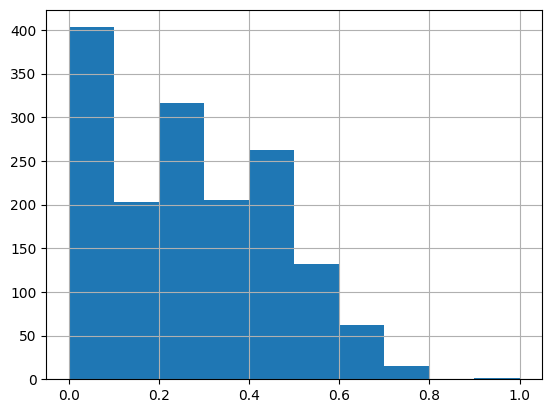

In [29]:
redwine_df['"citric acid"'].hist()

# Question or goal to complete

Go to open data buffalo,   look under "data" and filter down to show only datasets.

Find an interesting looking data set,  find the URL for the dataset and load it into a pandas data frame,  using the URL if
you can.

Some of the URL links load the data in ways that are not compatible with the pd.read_csv function.  If that happens,  download
the data as a CSV and load it that way

Find out the following,  putting each of these in separate cell and adding comments to the notebooks

-the size of the data
-show the head
-use describe() to get some basic statistics
-show the column names
- try to create a histogram of one column,  if you have continuous data in the dataframe


If you have dates in the dataset,  convert that column to the pandas datatime object

                  df['Date'] = df['Date'].astype('datetime64[ns]')

 pandas has member functions for working with dates as distinct type of variable   

In [42]:
url="https://data.buffalony.gov/resource/ivrf-k9vm.csv"

df_citations=pd.read_csv(url)

#make sure the data frome has no white space in the column names- this causes odd problems later

df_citations.columns = df_citations.columns.str.strip()
df_citations.head()

,uniquekey,case_number,date,case_type,status,code,code_section,description,comments,inspector,...,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,tractce20,geoid20_block,geoid20_tract,geoid20_blockgroup
0,334019,GEN22-9503941,2022-04-29T00:00:00.000,GENERAL,CLOSED,IPMC-304.7,Exterior Structure,Roofs and drainage,THE ROOF HAS EXTENSIVE FIRE DAMAGE ON THE REAR...,MIKE DILLON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,355594,GEN22-9513241,2022-12-05T00:00:00.000,GENERAL,ACTIVE,IPMC-308.1,Rubbish and Garbage,Accumulation of rubbish or garbage,REMOVE ALL GARBAGE AND DEBRIS FROM ALL YARDS W...,MIKE DILLON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,268538,GEN19-9474886,2019-12-20T00:00:00.000,GENERAL,COMPLIED,IPMC-304.9,Exterior Structure,Overhang extensions,TEST,ANDREW BLERSCH,...,48,1,1002,48,1,1002,004800,360290048001002,36029004800,360290048001
3,341735,GEN22-9508330,2022-07-07T00:00:00.000,GENERAL,CLOSED,IPMC-304.13,Exterior Structure,"Window, skylight and door frames",Broken window on the left side of the house ne...,JUSTIN KENDALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,292048,GEN20-9486751,2020-10-15T00:00:00.000,GENERAL,COMPLIED,IPMC-302.4,Exterior Property Areas,Weeds,&nbsp;High weeds must be cut in the rear yard ...,KEVIN GOULD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

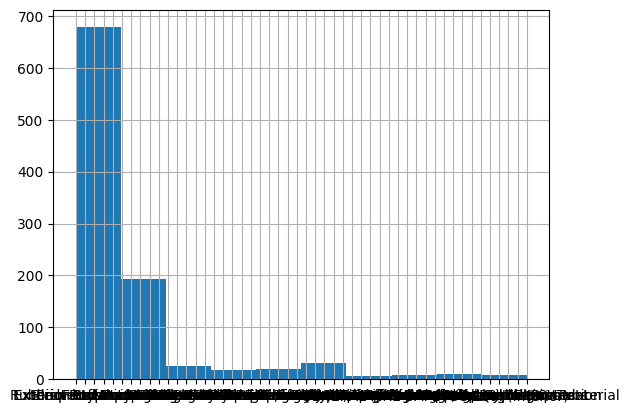

In [35]:
df_art["code_section"].hist()

# Grouping

This allows you to apply the built in operations using a categorical grouping variable

In [39]:
# there is a group by operation available
# note that in the groupy operation, I had to give the full name of the column df_art['type']
# which not what the pandas manual indicates

df_art['title'].groupby(df_art['type']).count()

type
ABSTRACT                  7
ANTIQUE CLOCK             2
ANTIQUE TOOL              1
BAROMETER                 1
BLUE PRINTS               1
BOOK                      2
BUST                      9
CANNONS                   1
DOORS                     1
DRAWING                   6
FIGURATIVE               29
FIGURATIVE AND RELIEF     3
FIGURITIVE                1
FOUNTAIN                  6
FURNITURE                 1
GARMENT                   1
LAMP                      3
LANDSCAPE                 5
LETTER/PHOTOGRAPH         1
LUNETTE MURAL             3
MAP                       5
MURAL                     4
PHOTOGRAPH                2
PLAQUE                   34
PLAQUES                   1
PORTRAIT                 62
RELIEF                   25
TIME CAPSULE              3
URN                       1
VARIOUS                   2
Name: title, dtype: int64

Creating a Pivot Table

In [45]:
table=pd.pivot_table(df_art,values='category',index=['site'],columns='inspector',aggfunc="count")

print(table)

KeyError: 'inspector'

In [41]:
df_art.columns

Index(['title', 'category', 'type', 'medium', 'frame', 'photo_url_link',
       'artist', 'contractor', 'founder', 'architect', 'carver', 'designer',
       'date', 'object_height_in', 'object_width_in', 'object_depth_in',
       'object_diameter_in', 'base_height_in', 'base_width_in',
       'base_depth_in', 'base_diameter_in', 'plaque_inscription', 'site',
       'street_address', 'city', 'zip_code', 'state', 'latitude', 'longitude',
       'geocoded_column'],
      dtype='object')

# Question or goal

Figure out how to create a Pivot table using the data you downloaded from Open Data Buffalo

Look for categories, and use the count option

In [46]:
table=pd.pivot_table(df_citations,values='code_section',index=['status','case_type'],columns='inspector',aggfunc="count")

print(table)

inspector           ANDREW BLERSCH  ANGELA   WHITE  BRIAN HAYDEN  \
status   case_type                                                 
ACTIVE   GENERAL               1.0            16.0           3.0   
CLOSED   GENERAL               6.0             3.0           NaN   
COMPLIED GENERAL              17.0            13.0           NaN   

inspector           BRIAN HIGGINS  CHARLES DIDIO  CHRISTOPHER CURTIN  \
status   case_type                                                     
ACTIVE   GENERAL              NaN            2.0                 5.0   
CLOSED   GENERAL              4.0            2.0                 NaN   
COMPLIED GENERAL              6.0            2.0                 1.0   

inspector           CHRISTOPHER LAZARUS  D ZAFUTO  DANIEL J PURCELL  \
status   case_type                                                    
ACTIVE   GENERAL                    3.0       NaN               1.0   
CLOSED   GENERAL                    3.0       NaN               NaN   
COMPLIED GENER

# Melting a data frame

Converts a "wide format" data frame into a "long format" data frame

In a long format data frame,  we have 1 or more identifier columns,  here I used title as the identifier- think of this
like a data base index.   Note, you can have a composite index of more than one column

The other two columns are the name of the variable followed by the value

So the "melted form" is always  index, variable, value

Some types of operations are easily carried out on the melted or long form of a dataframe

I've figured out some cool plotting tactics, but other than that I don't use this form much.  I should learn to do that
more effectively.

In [47]:
temp=pd.melt(df_art,id_vars=['title'],value_vars=['category','type','photo_url_link','latitude','longitude'])
temp.head(10)

,title,variable,value
0,SOLE PARK,category,SCULPTURE
1,BUFFALO STREET MAP,category,GRAPHIC ARTS
2,WAR MEMORIAL STADIUM RENDERING,category,GRAPHIC ARTS
3,MAYOR HIRAM BARTON,category,PAINTINGS
4,MAYOR ELI COOK,category,GRAPHICS ARTS
5,MAYOR ANTHONY MASIELLO,category,PAINTINGS
6,MAYOR CHANDLER J WELLS,category,PAINTINGS
7,MCMILLAN FOUNTAIN,category,DECORATIVE OBJECTS
8,SESQUICENTENNIAL TIME CAPSULE,category,DECORATIVE OBJECTS
9,ISOCHRONIC MOUNTAIN BUFFALO,category,SCULPTURE


In [48]:
temp.tail(10)

,title,variable,value
1110,MAYOR ALEXANDER BRUSH,longitude,-78.879354
1111,MAYOR SOLOMON SCHEU,longitude,-78.879354
1112,WILLIAM L MARCY JR,longitude,-78.873155
1113,SURVEY RULER,longitude,-78.879354
1114,FRANK CALLAHAN MEMORIAL,longitude,-78.810073
1115,CHRISTOPHER COLUMBUS,longitude,-78.89306
1116,BUFFALO STREET MAP,longitude,-78.879354
1117,POLISH-AMERICAN VETERANS MEMORIAL,longitude,-78.880826
1118,THE BATTLE WITHIN,longitude,-78.881144
1119,CORONATION DAY,longitude,-78.87959


#  Question- Create a melt of your data set, with a couple of variables included

What variable or variables will you need in your index.  Do you need a composite index?

Bonus- how could you make use of this melted version of the data?   I've used melted data to produce some interesting plots, but it's tough to think of other uses

unique_key, no

In [59]:
temp=pd.melt(df_citations,id_vars=['uniquekey'],value_vars=['case_type','status','code_section','latitude','longitude'])
temp.head()

,uniquekey,variable,value
0,334019,case_type,GENERAL
1,355594,case_type,GENERAL
2,268538,case_type,GENERAL
3,341735,case_type,GENERAL
4,292048,case_type,GENERAL


# Slicing and accessing sections of a data frame

In [63]:
# create an example frame from a dictionary

data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
t_frame = pd.DataFrame(data)

In [64]:
t_frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [65]:
# accessing colums, two forms

print(t_frame['state'])
print("--------------------------")

print(t_frame.state)

0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object
--------------------------
0      Ohio
1      Ohio
2      Ohio
3    Nevada
4    Nevada
5    Nevada
Name: state, dtype: object


In [66]:
# there is also a loc attribute that can pull rows

t_frame.loc[3]

state    Nevada
year       2001
pop         2.4
Name: 3, dtype: object

In [67]:
t_frame.loc[2:3]

,state,year,pop
2,Ohio,2002,3.6
3,Nevada,2001,2.4


In [68]:
# we can add columns by assignment
t_frame['debt'] =-1

Look at t_frame after the debt term was added,  what has happened?   Can you figure out how to set debt to a set of different
random values (1 per state)


In [56]:
t_frame

,state,year,pop,debt
0,Ohio,2000,1.5,-1
1,Ohio,2001,1.7,-1
2,Ohio,2002,3.6,-1
3,Nevada,2001,2.4,-1
4,Nevada,2002,2.9,-1
5,Nevada,2003,3.2,-1


In [106]:
values = np.random.normal(2,2,6)
values

array([ 2.91870312,  1.2803536 ,  2.42035101, -0.31060132,  2.09492899,
        1.59790909])

In [107]:
t_frame['debt'] = values

t_frame

,state,year,pop,debt
0,Ohio,2000,1.5,2.918703
1,Ohio,2001,1.7,1.280354
2,Ohio,2002,3.6,2.420351
3,Nevada,2001,2.4,-0.310601
4,Nevada,2002,2.9,2.094929
5,Nevada,2003,3.2,1.597909


In [92]:
# Add a boolean column to t-frame identifying eastern states

t_frame['eastern']= (t_frame.state=="Ohio")

t_frame

,state,year,pop,debt,eastern
0,Ohio,2000,1.5,3.633458,True
1,Ohio,2001,1.7,3.633458,True
2,Ohio,2002,3.6,3.633458,True
3,Nevada,2001,2.4,0.042895,False
4,Nevada,2002,2.9,0.042895,False
5,Nevada,2003,3.2,0.042895,False


In [93]:
# we can use the del method to remove a column

del t_frame['eastern']

t_frame.columns

Index(['state', 'year', 'pop', 'debt'], dtype='object')

In [94]:
# Reindexing- changeing the order of columns or rows

a=pd.Series([4.5,7.2,-5.3,3.6], index=['d','b','a','c'])
a

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [95]:
a2=a.reindex(['a','b','c','d'])
a2

a   -5.3
b    7.2
c    3.6
d    4.5
dtype: float64

In [96]:
# reordering a data frame

frame = pd.DataFrame(np.arange(9).reshape((3, 3)), index=['a', 'c', 'd'],columns=['Ohio', 'Texas', 'California'])
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [97]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

# note the insertion of the blank row for b,  NaN means not a number

frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [ ]:
# reordering columns,  using the columns keyword

states = ['Texas', 'Utah', 'California']

frame.reindex(columns=states)



,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


It's not obvious to me what the point of reindexing is,  I guess you could clean up the appearance of dataframes
for output?  Any ideas?

In [108]:
# Dropping elements

data = pd.DataFrame(np.arange(16).reshape((4, 4)),index=['Ohio', 'Colorado', 'Utah', 'New York'],columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [109]:
data.drop(['Ohio','Colorado'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [110]:
data.drop(['two','four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [111]:
# Indexing with integers- works like standard numpy or python index- note the need to use iloc()

data.iloc[0,0]

0

In [112]:
data.iloc[0:2,]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [113]:
#loc uses the column and row names

data.loc[["Colorado","Utah"],"three"]

Colorado     6
Utah        10
Name: three, dtype: int64

# Question/activity

Show several slices of your data frame,   using column names and integer locations

Explain what is happening in the slice

In [114]:
data.iloc[1:3,]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11


colorado and utah with all digits

In [117]:
data.iloc[0:4,1:3]

,two,three
Ohio,1,2
Colorado,5,6
Utah,9,10
New York,13,14


all states with only 2 and 3

In [127]:
data.loc[['Colorado','New York'],['one','four']]

,one,four
Colorado,4,7
New York,12,15


colorado and newyork with digits one and four

# Function Application and Mapping

Mapping refers to applying functions across a data structure

The numpy methods also work on Pandas data frames

In [129]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0.031404,0.345580,-0.488022
Ohio,1.297090,0.764588,1.441598
Texas,-1.278971,-0.154251,0.764365
Oregon,0.878974,-0.358079,1.958179


In [130]:
# applying a lambda function to the columns of an array
# a lambda function is one defined in a single line

f=lambda x: x.max()-x.min()

# the default apply() is by column,   as per the R apply() function

frame.apply(f)

b    2.576061
d    1.122667
e    2.446202
dtype: float64

In [131]:
# we can also use apply() across rows instead of columns

frame.apply(f,axis="columns")

Utah      0.833602
Ohio      0.677010
Texas     2.043335
Oregon    2.316259
dtype: float64

Note that there are a number of member functions, which don't require the use of apply(),   frame.mean(), max, min, sum
etc

use dir(frame) to see what is availabe.

There is a version of apply called applymap() that acts on each element in the data frame

In [132]:
mysquare= lambda x: x**2

frame.applymap(mysquare)

,b,d,e
Utah,0.000986,0.119426,0.238166
Ohio,1.682444,0.584595,2.078205
Texas,1.635766,0.023793,0.584254
Oregon,0.772595,0.128221,3.834466


In [ ]:
# Sorting and Ranking

In [133]:
# sorting by index

tseries = pd.Series(range(4), index=['d', 'a', 'b', 'c'])

tseries.sort_index()


a    1
b    2
c    3
d    0
dtype: int64

In [134]:
tframe = pd.DataFrame(np.arange(8).reshape((2, 4)),index=['three', 'one'],columns=['d', 'a', 'b', 'c'])
tframe

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [135]:
# sort by row
tframe.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [136]:
# sort by column

tframe.sort_index(axis='columns')

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [ ]:
# sort by values,  rather than by indices
tframe.sort_values(by="b")

#Question

produce a version of your data set from open data buffalo,  sorted by one of the columns

Figure out how to create a reversed or backwards sorted version of the data frame as well

In [139]:
url="https://data.buffalony.gov/resource/ivrf-k9vm.csv"

df_citations=pd.read_csv(url)

#make sure the data frome has no white space in the column names- this causes odd problems later

df_citations.columns = df_citations.columns.str.strip()

In [146]:
df_citations.sort_values(by="status", ascending=False )

,uniquekey,case_number,date,case_type,status,code,code_section,description,comments,inspector,...,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,tractce20,geoid20_block,geoid20_tract,geoid20_blockgroup
500,147493,GEN16-9423021,2016-11-14T00:00:00.000,GENERAL,COMPLIED,PM-305.3,Property Maintenance,INTERIOR SURFACES,"<FONT size=5>REPAIR THE INTERIOR FLOORS, CEILI...",PAUL CLIFT,...,11,3,3008,11,3,3007,001100,360290011003008,36029001100,360290011003
269,214643,GEN18-9448777,2018-08-23T00:00:00.000,GENERAL,COMPLIED,IPMC-308.1,Rubbish and Garbage,Accumulation of rubbish or garbage,Exterior property and premises shall be mainta...,MICHAEL J KELLY,...,37,2,2007,37,2,2007,003700,360290037002007,36029003700,360290037002
593,155600,GEN16-9422656,2017-02-24T00:00:00.000,GENERAL,COMPLIED,IPMC-302.7,Exterior Property Areas,Accessory structures,Garage door is missing.,DAVID GILSON,...,43,2,2001,43,2,2001,004300,360290043002001,36029004300,360290043002
277,127377,GEN16-9415950,2016-04-12T00:00:00.000,GENERAL,COMPLIED,B242.3.1,Buffalo Ordinance,UPHOLSTERED FURNITURE OUTSIDE,upholstered furniture on open porch is a harbo...,DAVID ZAFUTO,...,52.02,2,2007,52.02,2,2013,005202,360290052022007,36029005202,360290052022
594,335775,GEN22-9504567,2022-05-17T00:00:00.000,GENERAL,COMPLIED,IPMC-308.1,Rubbish and Garbage,Accumulation of rubbish or garbage,All trash and debris must be removed from the ...,JUSTIN KENDALL,...,71.04,1,1002,71.01,1,1003,007104,360290071041002,36029007104,360290071041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,192212,GEN18-9439432,2018-02-05T00:00:00.000,GENERAL,ACTIVE,IPMC-304.7,Exterior Structure,Roofs and drainage,"The roof and flashing shall be sound, tight an...",JOHN ROSSI,...,38,1,1003,38,1,1003,003800,360290038001003,36029003800,360290038001
610,184358,GEN17-9437178,2017-10-11T00:00:00.000,GENERAL,ACTIVE,B341.13D,Buffalo Ordinance,STATEMENT OF INTENTION,<EM><SPAN style='FONT-SIZE: 12pt; FONT-FAMILY:...,GARY ZIOLKOWSKI,...,59,1,1000,59,1,1000,005900,360290059001000,36029005900,360290059001
609,273885,GEN20-9476989,2020-02-18T00:00:00.000,GENERAL,ACTIVE,IPMC-304.7,Exterior Structure,Roofs and drainage,Roof leak is occurring at rear portion of the ...,JOHN C STEPHENS,...,67.01,2,2000,67.01,3,3000,006701,360290067012000,36029006701,360290067012
606,165254,GEN17-9428425,2017-05-17T00:00:00.000,GENERAL,ACTIVE,IPMC-301.3,Exterior Property Areas,Vacant structures and land,Vacant structures and premises thereof or vaca...,GARY ZIOLKOWSKI,...,37,4,4004,37,4,4006,003700,360290037004004,36029003700,360290037004


In [147]:
df_citations.sort_values(by="status")

,uniquekey,case_number,date,case_type,status,code,code_section,description,comments,inspector,...,census_tract,census_block_group,census_block,census_tract_2010,census_block_group_2010,census_block_2010,tractce20,geoid20_block,geoid20_tract,geoid20_blockgroup
499,150610,GEN16-9423861,2016-12-22T00:00:00.000,GENERAL,ACTIVE,PM-307.1,Property Maintenance,ACCUMULATION RUBBISH/GARBAGE,REMOVE ALL TRASH AND DEBRIS FROM ALL YARDS AND...,JOHN C STEPHENS,...,70,3,3000,70,3,3000,007000,360290070003000,36029007000,360290070003
538,305252,GEN21-9492796,2021-05-20T00:00:00.000,GENERAL,ACTIVE,B511.93,Buffalo Ordinance,Storage of Motor Vehicles,two unregistered vehicles must be removed,JEORGE DAWKINS,...,168.02,2,2010,168,4,4010,016802,360290168022010,36029016802,360290168022
540,265573,GEN19-9473365,2019-11-18T00:00:00.000,GENERAL,ACTIVE,R312.4.2,V7MIGRATION,CO DETECTORS,<STRONG><FONT size=5>INSTALL CO DETECTORS IN E...,PAUL CLIFT,...,16.02,1,1024,16,1,1014,001602,360290016021024,36029001602,360290016021
541,160923,GEN17-9426462,2017-04-07T00:00:00.000,GENERAL,ACTIVE,IPMC-302.6,Exterior Property Areas,Exhaust vents,"Pipes, ducts, conductors, fans or blowers shal...",GARY ZIOLKOWSKI,...,11,1,1007,11,1,1010,001100,360290011001007,36029001100,360290011001
544,163358,GEN17-9427850,2017-04-26T00:00:00.000,GENERAL,ACTIVE,IPMC-304.5,Exterior Structure,Foundation walls,<STRONG><FONT size=5>REPAIR THE SKIRTING AND M...,PAUL CLIFT,...,163,3,3000,163,3,3001,016300,360290163003000,36029016300,360290163003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,161594,GEN17-9426613,2017-04-18T00:00:00.000,GENERAL,COMPLIED,IPMC-704.2.1.2,Fire Protection Systems,Smoke alarm -Group R2/3/4/I1,Smoke detectors are required inside and outsid...,PAUL BANYI,...,27.03,1,1014,27.02,4,4006,002703,360290027031014,36029002703,360290027031
680,243087,GEN19-9460728,2019-06-24T00:00:00.000,GENERAL,COMPLIED,IPMC-304.6,Exterior Structure,Exterior Walls,The siding on the house has chipping and peeli...,SEAN MYERS,...,167,3,3011,167,3,3019,016700,360290167003011,36029016700,360290167003
438,247121,GEN19-9461875,2019-08-07T00:00:00.000,GENERAL,COMPLIED,IPMC-302.5,Exterior Property Areas,Rodent harborage,<P>Structures and exterior property shall be k...,THOMAS CARTER,...,6,3,3004,6,3,3004,000600,360290006003004,36029000600,360290006003
675,317322,GEN21-9497332,2021-10-06T00:00:00.000,GENERAL,COMPLIED,IPMC-304.10,Exterior Structure,"Stairways, decks, porches and balconies",The existing porch decking of the building exh...,RICHARD BALESTERI,...,34,2,2003,34,2,2003,003400,360290034002003,36029003400,360290034002
